# Python Week 5 CS

## Shahin Mammadov

You asked to create Support Vector Machine (with both Linear and RBF kernel) classifier, Decision
Tree classifier, Random Forest classifier, Logistic Regression, Naïve Bayes classifier, KNN classifier to
predict whether patients have heart disease or not and decide which algorithm performs the best on
average.

In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv("heart.csv")

In [3]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
for x in data.columns:
    print ("----------%s" % x)
    print (data[x].value_counts())

----------age
58    19
57    17
54    16
59    14
52    13
51    12
62    11
60    11
44    11
56    11
64    10
41    10
63     9
67     9
65     8
43     8
45     8
55     8
42     8
61     8
53     8
46     7
48     7
66     7
50     7
49     5
47     5
70     4
39     4
35     4
68     4
38     3
71     3
40     3
69     3
34     2
37     2
29     1
74     1
76     1
77     1
Name: age, dtype: int64
----------sex
1    207
0     96
Name: sex, dtype: int64
----------cp
0    143
2     87
1     50
3     23
Name: cp, dtype: int64
----------trestbps
120    37
130    36
140    32
110    19
150    17
138    13
128    12
160    11
125    11
112     9
132     8
118     7
124     6
135     6
108     6
152     5
134     5
145     5
122     4
170     4
100     4
105     3
126     3
115     3
180     3
136     3
142     3
102     2
148     2
178     2
94      2
144     2
146     2
200     1
114     1
154     1
123     1
192     1
174     1
165     1
104     1
117     1
101     1
156     1
106   

In [6]:
from scipy import stats
data[(np.abs(stats.zscore(data)) < 3).all(axis=1)]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [7]:
from sklearn.model_selection import train_test_split

X = pd.DataFrame(np.c_[data['age'], data['sex'], data['cp'], data['trestbps'], data['chol'], data['fbs'], data['restecg'], data['thalach'], data['exang'], data['oldpeak'], data['slope'], data['ca'], data['thal']])
y = data['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=None)

from sklearn.preprocessing import StandardScaler    
st_x= StandardScaler()    
X_train= st_x.fit_transform(X_train)    
X_test= st_x.transform(X_test)  

## Logistic Regression

In [8]:
from sklearn.linear_model import LogisticRegression

In [9]:
regressor = LogisticRegression()
regressor.fit(X_train, y_train)
y_pred_lr = regressor.predict(X_test)

In [10]:
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred_lr)

0.8681318681318682

In [11]:
metrics.confusion_matrix(y_test, y_pred_lr)

array([[36,  8],
       [ 4, 43]], dtype=int64)

## Naive Bayes

In [12]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred_nb = gnb.predict(X_test)

In [13]:
metrics.accuracy_score(y_test, y_pred_nb)

0.8351648351648352

## K-Nearest Neighbour

In [14]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

neighbors = np.arange(1, 40)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))
  
for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
      
    # Compute training and test data accuracy
    train_accuracy[i] = knn.score(X_train, y_train)
    test_accuracy[i] = knn.score(X_test, y_test)

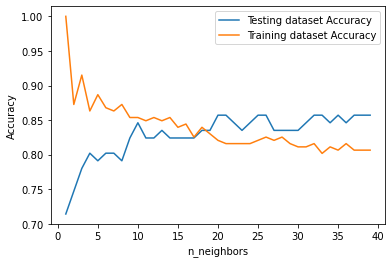

In [15]:
plt.plot(neighbors, test_accuracy, label = 'Testing dataset Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training dataset Accuracy')
  
plt.legend()
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.show()

In [16]:
knn = KNeighborsClassifier(n_neighbors=37)
  
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

In [17]:
metrics.accuracy_score(y_test, y_pred_knn)

0.8571428571428571

## SVM

### Linear

In [18]:
from sklearn.svm import SVC
clf = SVC(kernel= 'linear')
clf.fit(X_train, y_train)
y_pred_lin = clf.predict(X_test)

In [19]:
metrics.accuracy_score(y_test, y_pred_lin)

0.9010989010989011

### RBF

In [20]:
classifier = SVC(kernel='rbf', random_state = 1)
classifier.fit(X_train,y_train)
y_pred_rbf = clf.predict(X_test)

In [21]:
metrics.accuracy_score(y_test, y_pred_rbf)

0.9010989010989011

## Decision tree

In [22]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
classifier.fit(X_train, y_train)

y_pred_dt = classifier.predict(X_test)

In [23]:
metrics.accuracy_score(y_test, y_pred_dt)

0.9120879120879121

## Random Forest Classifier

In [24]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)

y_pred_rfc = classifier.predict(X_test)

In [25]:
metrics.accuracy_score(y_test, y_pred_rfc)

0.8681318681318682